In [ ]:
!pip install nlpaug sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 4.8 MB/s eta 0:00:00


# 데이터 증강 및 변환

## 텍스트 데이터

### 단어 삽입

In [ ]:
import nlpaug.augmenter.word as naw

texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.ContextualWordEmbsAug(model_path="bert-base-uncased", action="insert")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
  print(f"src : {text}")
  print(f"dst : {augmented}")
  print("------------------")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

src : Those who can imagine anything, can create the impossible.
dst : those who can imagine do anything, though can also create the very impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : we can usually only now see a short distance straight ahead, but we still can see well plenty there for that needs to well be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : if a machine language is only expected not to already be infallible, it thus cannot therefore also be intelligent.
------------------


### 문자 삭제

In [ ]:
import nlpaug.augmenter.char as nac


texts = [
  "Those who can imagine anything, can create the impossible.",
  "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
  "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = nac.RandomCharAug(action="delete")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
  print(f"src : {text}")
  print(f"dst : {augmented}")
  print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : hos who can mane anything, can crte the mpsible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can ly see a short disnc hea, but we can see plenty tee th ees to be dn.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a mahn is expee to be infallible, it caot ao be itlient.
------------------


### 단어 교체

In [ ]:
aug = naw.RandomWordAug(action="swap")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Those can who anything imagine, create can the. impossible
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can only see a short ahead distance, but we can plenty see there needs that to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a is machine to expected be, infallible it cannot be also. intelligent
------------------


### 단어 대체 (1)

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet')
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


src : Those who can imagine anything, can create the impossible.
dst : Those who tush envisage anything, stool make the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We lavatory only if see a short space forwards, but we bottom see plenty at that place that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a auto is require to comprise infallible, it cannot also embody intelligent.
------------------


### 단어 대체 (2)

In [ ]:
reserved_tokens = [
    ["can", "can't", "cannot", "could"],
]

reserved_aug = naw.ReservedAug(reserved_tokens=reserved_tokens)
augmented_texts = reserved_aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Those who cannot imagine anything, can't create the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We could only see a short distance ahead, but we can't see plenty there that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is expected to be infallible, it can't also be intelligent.
------------------


### 역번역

입력 텍스트를 특정 언어로 번역한 다음 다시 본래의 언어로 번역하는 방법

In [ ]:
back_translation = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de',
    to_model_name='facebook/wmt19-de-en'
)
augmented_texts = back_translation.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-en-de and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-de-en and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

src : Those who can imagine anything, can create the impossible.
dst : Anyone who can imagine anything can achieve the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can only look a little ahead, but we can see a lot there that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is expected to be infallible, it cannot be intelligent.
------------------


## 이미지 데이터

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pathlib import Path
from matplotlib import pyplot as plt
from PIL import Image

from torchvision import transforms

In [5]:
ROOT_PATH = Path("/content/drive/MyDrive/blog/PyTorch_using_transformers")
DATA_PATH = Path("./datasets")

!unzip -q {ROOT_PATH / "archive.zip"}

### 통합 클래스 및 변환 적용 방식

In [6]:
transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)),
        transforms.ToTensor(),
    ]
)

image = Image.open(DATA_PATH / "images" / "cat.jpg")
transformed_image = transform(image)

print(transformed_image.shape)

torch.Size([3, 512, 512])


### 회전 및 대칭

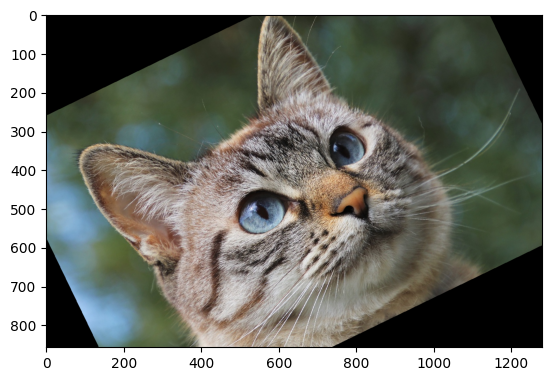

In [ ]:
transform = transforms.Compose(
    [
        transforms.RandomRotation(degrees=30, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
    ]
)

transformed_image = transform(image)
plt.imshow(transformed_image)

### 자르기 및 패딩

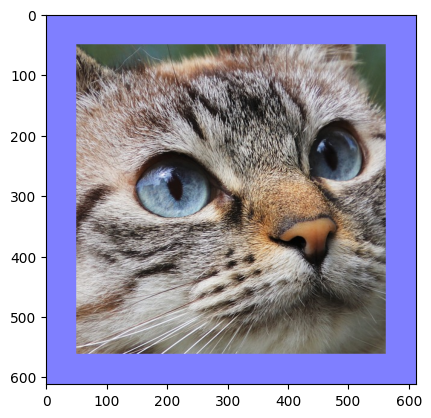

In [ ]:
transform = transforms.Compose(
    [
        transforms.RandomCrop(size=(512, 512)),
        transforms.Pad(padding=50, fill=(127, 127, 255), padding_mode="constant")
    ]
)

transformed_image = transform(image)
plt.imshow(transformed_image)

### 크기 조정

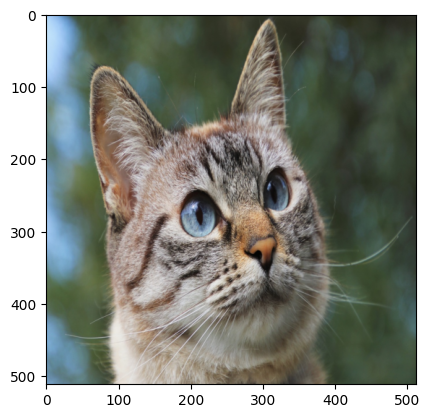

In [ ]:
transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512))
    ]
)

transformed_image = transform(image)
plt.imshow(transformed_image)

### 아핀 변환

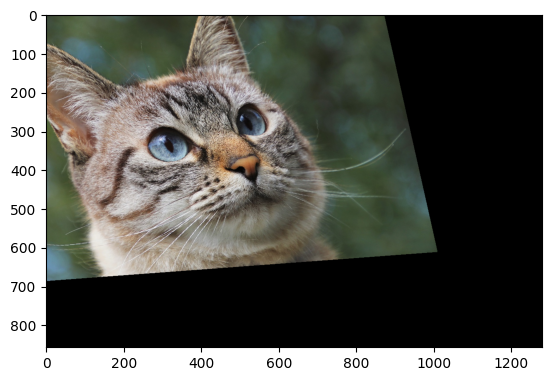

In [ ]:
transform = transforms.Compose(
    [
        transforms.RandomAffine(
            degrees=15, translate=(0.2, 0.2),
            scale=(0.8, 1.2), shear=15
        )
    ]
)

transformed_image = transform(image)
plt.imshow(transformed_image)

### 색상 변환 및 정규화

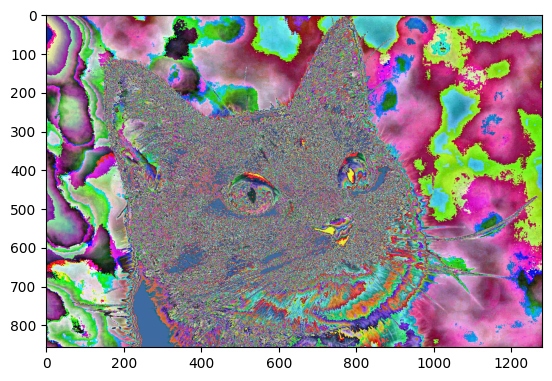

In [ ]:
transform = transforms.Compose(
    [
        transforms.ColorJitter(
            brightness=0.3, contrast=0.3,
            saturation=0.3, hue=0.3
        ),
        transforms.ToTensor(),
        transforms.Normalize(
            mean = [0.485, 0.456, 0.406],
            std = [0.229, 0.224, 0.225]
        ),
        transforms.ToPILImage()
    ]
)

transformed_image = transform(image)
plt.imshow(transformed_image)

### 노이즈 추가

In [ ]:
import numpy as np
from imgaug import augmenters as iaa

/usr/local/lib/python3.10/dist-packages/imgaug/augmenters/base.py:27: SuspiciousMultiImageShapeWarning: You provided a numpy array of shape (857, 1280, 3) as a multi-image augmentation input, which was interpreted as (N, H, W). The last dimension however has value 1 or 3, which indicates that you provided a single image with shape (H, W, C) instead. If that is the case, you should use e.g. augmenter(image=<your input>) or augment_image(<your input>) -- note the singular 'image' instead of 'imageS'. Otherwise your single input image will be interpreted as multiple images of shape (H, W) during augmentation.
  ia.warn(


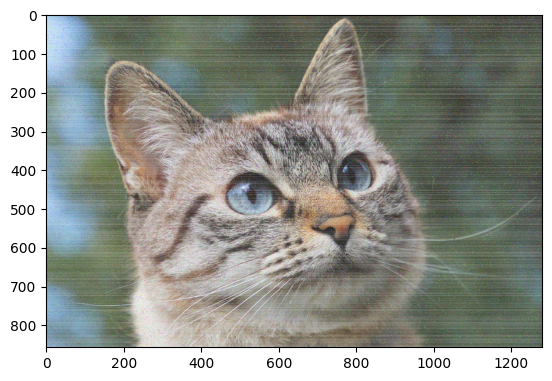

In [ ]:
class IaaTransforms:
  def __init__(self):
    self.seq = iaa.Sequential([
        iaa.SaltAndPepper(p=(0.01, 0.07)), # 점잡음
        iaa.Rain(speed=(0.3, 0.7)),
    ])

  def __call__(self, images):
    images = np.array(images)
    augmented = self.seq.augment_images(images)
    return Image.fromarray(augmented)

transform = transforms.Compose([
    IaaTransforms(),
])

transformed_image = transform(image)
plt.imshow(transformed_image)

### 무작위 지우기

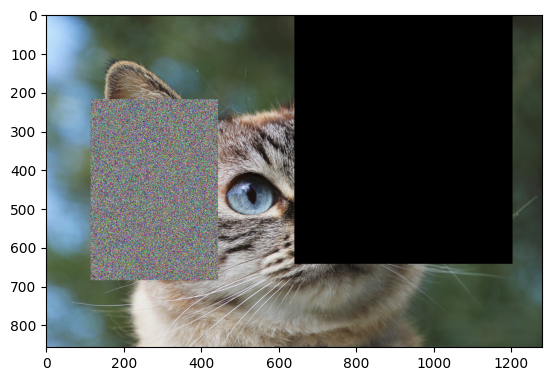

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=1.0, value=0), # 컷아웃
    transforms.RandomErasing(p=1.0, value='random'), # 무작위 지우기
    transforms.ToPILImage()
])

transformed_image = transform(image)
plt.imshow(transformed_image)

### 혼합

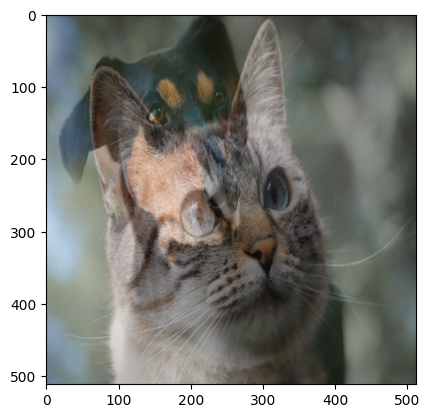

In [ ]:
class Mixup:
  def __init__(self, target, scale, alpha=0.5, beta=0.5):
    self.target = target
    self.scale = scale
    self.alpha = alpha
    self.beta = beta

  def __call__(self, image):
    image = np.array(image)
    target = self.target.resize(self.scale)
    target = np.array(target)
    mix_image = image * self.alpha + target * self.beta
    return Image.fromarray(mix_image.astype(np.uint8))

transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)),
        Mixup(
            target=Image.open(DATA_PATH / 'images' / 'dog.jpg'),
            scale=(512, 512),
        )
    ]
)

transformed_image = transform(image)
plt.imshow(transformed_image)